In [44]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [46]:
# Add the latitudes and longitudes to a list. unpack our lat_lngs zip object into a list
coordinates = list(lat_lngs)

In [47]:
# import the citipy module 
from citipy import citipy

In [48]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [49]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [50]:
# Build the basic URL for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [51]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [52]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    if (i % 50 == 0 and i >= 50):
        # # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
        set_count += 1
        record_count = 1
    # 4 Build the city_url or endpoint for each city.
    city_url = url + city.replace(" ","+") + "&appid=" + weather_api_key

    # 5 Log the URL and the record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# 6 Make an API request for each city.
    try:
        # 7. Parse the JSON weather data for the following:
            # # City, country, and date
            # # Latitude and longitude
            # # Maximum temperature
            # # Humidity
            # # Cloudiness
            # # Wind speed
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | chicama
Processing Record 2 of Set 1 | raudeberg
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | coihueco
Processing Record 5 of Set 1 | channel-port aux basques
Processing Record 6 of Set 1 | hornepayne
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | mogadishu
Processing Record 10 of Set 1 | strezhevoy
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | krasnoselkup
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | muhos
Processing Record 17 of Set 1 | zabaykalsk
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | omboue
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | husavik
Processing Record 23 of Set 1 | badiraguato
Proces

Processing Record 37 of Set 4 | hithadhoo
Processing Record 38 of Set 4 | paamiut
Processing Record 39 of Set 4 | mbuji-mayi
Processing Record 40 of Set 4 | kununurra
Processing Record 41 of Set 4 | naze
Processing Record 42 of Set 4 | bambanglipuro
Processing Record 43 of Set 4 | bartica
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | moose factory
Processing Record 48 of Set 4 | novikovo
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | biggar
Processing Record 1 of Set 5 | marcona
City not found. Skipping...
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | kahului
Processing Record 5 of Set 5 | banjar
Processing Record 6 of Set 5 | mana
Processing Record 7 of Set 5 | ponta delgada
Processing Record 8 of Set 5 | montrose
Processing Record 9 of Set 5 | tiksi
Processing Record 10 of Set 5 | zemio
Proc

Processing Record 23 of Set 8 | dandong
Processing Record 24 of Set 8 | shenjiamen
Processing Record 25 of Set 8 | carutapera
Processing Record 26 of Set 8 | kayerkan
Processing Record 27 of Set 8 | bac lieu
Processing Record 28 of Set 8 | turukhansk
Processing Record 29 of Set 8 | batemans bay
Processing Record 30 of Set 8 | tame
Processing Record 31 of Set 8 | isetskoye
Processing Record 32 of Set 8 | mount darwin
Processing Record 33 of Set 8 | villamontes
Processing Record 34 of Set 8 | sioux lookout
Processing Record 35 of Set 8 | cangucu
Processing Record 36 of Set 8 | liaozhong
Processing Record 37 of Set 8 | isangel
Processing Record 38 of Set 8 | sovetskiy
Processing Record 39 of Set 8 | birzai
Processing Record 40 of Set 8 | fairbanks
Processing Record 41 of Set 8 | esperance
Processing Record 42 of Set 8 | workington
Processing Record 43 of Set 8 | moree
Processing Record 44 of Set 8 | leh
Processing Record 45 of Set 8 | saint-louis
Processing Record 46 of Set 8 | kota kinab

Processing Record 9 of Set 12 | bilma
Processing Record 10 of Set 12 | evensk
Processing Record 11 of Set 12 | rawson
Processing Record 12 of Set 12 | homer
Processing Record 13 of Set 12 | barinas
Processing Record 14 of Set 12 | half moon bay
Processing Record 15 of Set 12 | rovaniemi
Processing Record 16 of Set 12 | ontario
Processing Record 17 of Set 12 | chihuahua
Processing Record 18 of Set 12 | san quintin
Processing Record 19 of Set 12 | baoning
Processing Record 20 of Set 12 | sao domingos
Processing Record 21 of Set 12 | bandarbeyla
Processing Record 22 of Set 12 | camana
Processing Record 23 of Set 12 | road town
Processing Record 24 of Set 12 | constitucion
Processing Record 25 of Set 12 | burns lake
Processing Record 26 of Set 12 | vostok
Processing Record 27 of Set 12 | palmer
Processing Record 28 of Set 12 | rawlins
Processing Record 29 of Set 12 | guanica
Processing Record 30 of Set 12 | nikolsk
Processing Record 31 of Set 12 | qixia
Processing Record 32 of Set 12 | nab

In [61]:
len(city_data)

557

In [62]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicama,-7.8447,-79.1469,289.45,69,26,3.82,PE,2021-10-21 21:56:50
1,Raudeberg,61.9875,5.1352,278.81,79,100,1.79,NO,2021-10-21 21:56:50
2,Atuona,-9.8000,-139.0333,298.64,78,10,8.90,PF,2021-10-21 21:56:51
3,Coihueco,-36.6167,-71.8333,292.56,52,40,2.06,CL,2021-10-21 21:56:51
4,Channel-Port Aux Basques,47.5702,-59.1367,282.97,79,24,5.77,CA,2021-10-21 21:56:52
5,Hornepayne,49.2138,-84.7705,275.43,64,96,3.41,CA,2021-10-21 21:56:52
6,Grindavik,63.8424,-22.4338,277.41,65,75,4.12,IS,2021-10-21 21:56:52
7,Codrington,-38.2667,141.9667,287.43,89,51,0.43,AU,2021-10-21 21:56:53
8,Mogadishu,2.0371,45.3438,299.24,82,90,4.69,SO,2021-10-21 21:56:53
9,Strezhevoy,60.7333,77.5889,275.14,88,100,2.95,RU,2021-10-21 21:56:54


In [63]:
# reorder the columns
city_data_df = pd.DataFrame(city_data_df, columns=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chicama,PE,2021-10-21 21:56:50,-7.8447,-79.1469,289.45,69,26,3.82
1,Raudeberg,NO,2021-10-21 21:56:50,61.9875,5.1352,278.81,79,100,1.79
2,Atuona,PF,2021-10-21 21:56:51,-9.8000,-139.0333,298.64,78,10,8.90
3,Coihueco,CL,2021-10-21 21:56:51,-36.6167,-71.8333,292.56,52,40,2.06
4,Channel-Port Aux Basques,CA,2021-10-21 21:56:52,47.5702,-59.1367,282.97,79,24,5.77
5,Hornepayne,CA,2021-10-21 21:56:52,49.2138,-84.7705,275.43,64,96,3.41
6,Grindavik,IS,2021-10-21 21:56:52,63.8424,-22.4338,277.41,65,75,4.12
7,Codrington,AU,2021-10-21 21:56:53,-38.2667,141.9667,287.43,89,51,0.43
8,Mogadishu,SO,2021-10-21 21:56:53,2.0371,45.3438,299.24,82,90,4.69
9,Strezhevoy,RU,2021-10-21 21:56:54,60.7333,77.5889,275.14,88,100,2.95


In [64]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"git ag
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [71]:
# Import the time module.
import time
# Get today's date in seconds.
today =time.strftime("%x")
today

'10/21/21'

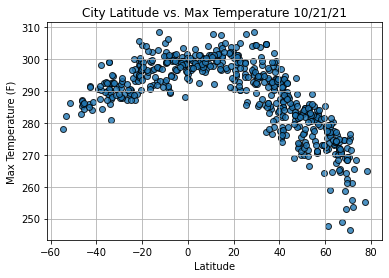

In [72]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

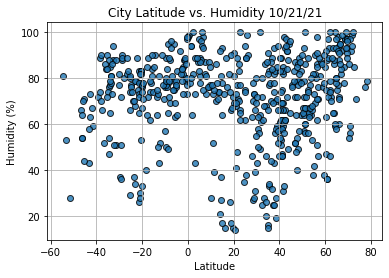

In [73]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

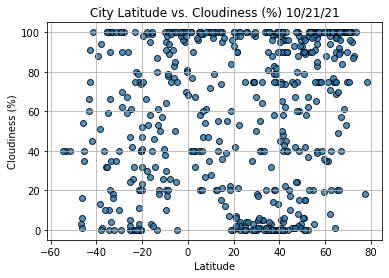

In [74]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

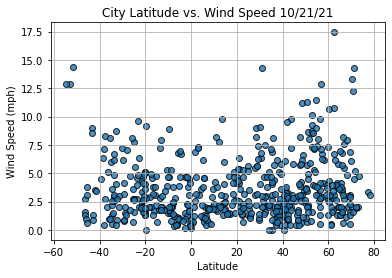

In [75]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()